#Libraries

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import math as ma


#Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Black_Friday_Sales/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Black_Friday_Sales/test.csv')

#Exploring training dataset

In [ ]:
train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [ ]:
#Dataset report
def column_report(train):
    a = pd.DataFrame(train.dtypes, columns=['dtype'])
    b = pd.DataFrame(train.isna().sum(), columns=['nulls'])
    b['%nulls'] = round(100 * b['nulls'] / train.shape[0], 2)
    c = train.describe(include='all').transpose()
    return a.join(b).join(c).sort_values(by=['dtype', 'nulls'])

report = column_report(train)
pd.set_option('display.max_rows', 1000)
report

dtype   nulls  %nulls     count unique  \
User_ID                       int64       0    0.00  550068.0    NaN   
Occupation                    int64       0    0.00  550068.0    NaN   
Marital_Status                int64       0    0.00  550068.0    NaN   
Product_Category_1            int64       0    0.00  550068.0    NaN   
Purchase                      int64       0    0.00  550068.0    NaN   
Product_Category_2          float64  173638   31.57  376430.0    NaN   
Product_Category_3          float64  383247   69.67  166821.0    NaN   
Product_ID                   object       0    0.00    550068   3631   
Gender                       object       0    0.00    550068      2   
Age                          object       0    0.00    550068      7   
City_Category                object       0    0.00    550068      3   
Stay_In_Current_City_Years   object       0    0.00    550068      5   

                                  top    freq            mean          std  \
User_ID                           NaN     NaN  1003028.842401  1727.591586   
Occupation                        NaN     NaN        8.076707      6.52266   
Marital_Status                    NaN     NaN        0.409653      0.49177   
Product_Category_1                NaN     NaN         5.40427     3.936211   
Purchase                          NaN     NaN     9263.968713  5023.065394   
Product_Category_2                NaN     NaN        9.842329      5.08659   
Product_Category_3                NaN     NaN       12.668243     4.125338   
Product_ID                  P00265242    1880             NaN          NaN   
Gender                              M  414259             NaN          NaN   
Age                             26-35  219587             NaN          NaN   
City_Category                       B  231173             NaN          NaN   
Stay_In_Current_City_Years          1  193821             NaN          NaN   

                                  min        25%        50%        75%  \
User_ID                     1000001.0  1001516.0  1003077.0  1004478.0   
Occupation                        0.0        2.0        7.0       14.0   
Marital_Status                    0.0        0.0        0.0        1.0   
Product_Category_1                1.0        1.0        5.0        8.0   
Purchase                         12.0     5823.0     8047.0    12054.0   
Product_Category_2                2.0        5.0        9.0       15.0   
Product_Category_3                3.0        9.0       14.0       16.0   
Product_ID                        NaN        NaN        NaN        NaN   
Gender                            NaN        NaN        NaN        NaN   
Age                               NaN        NaN        NaN        NaN   
City_Category                     NaN        NaN        NaN        NaN   
Stay_In_Current_City_Years        NaN        NaN        NaN        NaN   

                                  max  
User_ID                     1006040.0  
Occupation                       20.0  
Marital_Status                    1.0  
Product_Category_1               20.0  
Purchase                      23961.0  
Product_Category_2               18.0  
Product_Category_3               18.0  
Product_ID                        NaN  
Gender                            NaN  
Age                               NaN  
City_Category                     NaN  
Stay_In_Current_City_Years        NaN

In [ ]:
#We look for duplicates
train[train.duplicated(keep = False)]

Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []

#Exploring test dataset

In [ ]:
test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [ ]:
#Dataset report
def column_report(train):
    a = pd.DataFrame(test.dtypes, columns=['dtype'])
    b = pd.DataFrame(test.isna().sum(), columns=['nulls'])
    b['%nulls'] = round(100 * b['nulls'] / train.shape[0], 2)
    c = train.describe(include='all').transpose()
    return a.join(b).join(c).sort_values(by=['dtype', 'nulls'])

report_test = column_report(test)
pd.set_option('display.max_rows', 1000)
report_test

dtype   nulls  %nulls     count unique  \
User_ID                       int64       0    0.00  233599.0    NaN   
Occupation                    int64       0    0.00  233599.0    NaN   
Marital_Status                int64       0    0.00  233599.0    NaN   
Product_Category_1            int64       0    0.00  233599.0    NaN   
Product_Category_2          float64   72344   30.97  161255.0    NaN   
Product_Category_3          float64  162562   69.59   71037.0    NaN   
Product_ID                   object       0    0.00    233599   3491   
Gender                       object       0    0.00    233599      2   
Age                          object       0    0.00    233599      7   
City_Category                object       0    0.00    233599      3   
Stay_In_Current_City_Years   object       0    0.00    233599      5   

                                  top    freq            mean          std  \
User_ID                           NaN     NaN  1003029.356859  1726.504968   
Occupation                        NaN     NaN        8.085407     6.521146   
Marital_Status                    NaN     NaN         0.41007     0.491847   
Product_Category_1                NaN     NaN        5.276542      3.73638   
Product_Category_2                NaN     NaN        9.849586     5.094943   
Product_Category_3                NaN     NaN       12.669454     4.125944   
Product_ID                  P00265242     829             NaN          NaN   
Gender                              M  175772             NaN          NaN   
Age                             26-35   93428             NaN          NaN   
City_Category                       B   98566             NaN          NaN   
Stay_In_Current_City_Years          1   82604             NaN          NaN   

                                  min        25%        50%        75%  \
User_ID                     1000001.0  1001527.0  1003070.0  1004477.0   
Occupation                        0.0        2.0        7.0       14.0   
Marital_Status                    0.0        0.0        0.0        1.0   
Product_Category_1                1.0        1.0        5.0        8.0   
Product_Category_2                2.0        5.0        9.0       15.0   
Product_Category_3                3.0        9.0       14.0       16.0   
Product_ID                        NaN        NaN        NaN        NaN   
Gender                            NaN        NaN        NaN        NaN   
Age                               NaN        NaN        NaN        NaN   
City_Category                     NaN        NaN        NaN        NaN   
Stay_In_Current_City_Years        NaN        NaN        NaN        NaN   

                                  max  
User_ID                     1006040.0  
Occupation                       20.0  
Marital_Status                    1.0  
Product_Category_1               18.0  
Product_Category_2               18.0  
Product_Category_3               18.0  
Product_ID                        NaN  
Gender                            NaN  
Age                               NaN  
City_Category                     NaN  
Stay_In_Current_City_Years        NaN

In [ ]:
test.shape

(233599, 11)

In [ ]:
train.shape

(550068, 12)

#Nulls treatment

In [ ]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
train.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [ ]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
test.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

#Target visualization

sns.kdeplot(data=train, x='Purchase')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

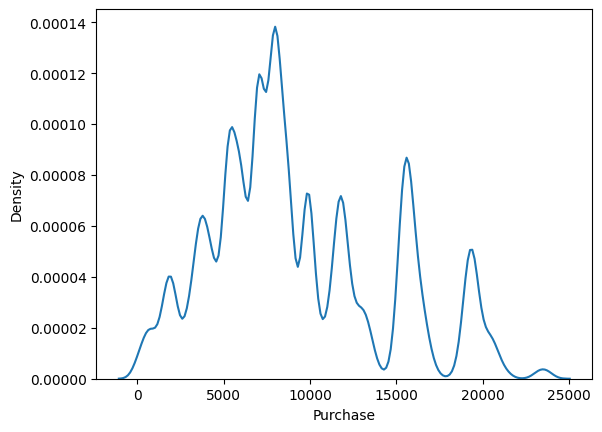

In [ ]:
#Target visualization
sns.kdeplot(data=train, x='Purchase')
plt.show

#Variable management

Gender

In [ ]:
train['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
# we replace the Gender column with the Boolean Gender F, M
train['Gender_F'] = train['Gender'].apply(lambda x:
                                              0 if x=='M'
                                              else 1)
test['Gender_F'] = test['Gender'].apply(lambda x:
                                              0 if x=='M'
                                              else 1)
train.drop('Gender', axis=1, inplace=True)
test.drop('Gender', axis=1, inplace=True)

Age

In [ ]:
train['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [ ]:
# We change the Age group by a number from lowest to highest depending on the group
train['Age'] = train['Age'].map({'0-17': 0,
                           '18-25': 1,
                           '26-35': 2,
                           '36-45': 3,
                           '46-50': 4,
                           '51-55': 5,
                           '55+': 6})

test['Age'] = test['Age'].map({'0-17': 0,
                                     '18-25': 1,
                                     '26-35': 2,
                                     '36-45': 3,
                                     '46-50': 4,
                                     '51-55': 5,
                                     '55+': 6})

#Occupation

In [ ]:
#we convert to numbers
train['Occupation'] = pd.to_numeric(train['Occupation'], errors='coerce')

In [ ]:
train['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [ ]:
# we check the % representation of each value of the variable
df_occupacion = train['Occupation'].value_counts(normalize=True).to_frame().reset_index()
df_occupacion.columns = ['Occupation', 'frecuencia']
df_occupacion

Occupation  frecuencia
0            4    0.131453
1            0    0.126599
2            7    0.107501
3            1    0.086218
4           17    0.072796
5           20    0.061014
6           12    0.056682
7           14    0.049647
8            2    0.048336
9           16    0.046123
10           6    0.037005
11           3    0.032087
12          10    0.023506
13           5    0.022137
14          15    0.022115
15          11    0.021063
16          19    0.015382
17          13    0.014049
18          18    0.012039
19           9    0.011437
20           8    0.002811

In [ ]:
# I add a column with the accumulated frequency
df_occupacion['frecuencia_cumul'] = df_occupacion['frecuencia'].cumsum()

In [ ]:
# I round and multiply by 100

df_occupacion['frecuencia'] = np.round(df_occupacion['frecuencia'].mul(100), 1)
df_occupacion['frecuencia_cumul'] = np.round(df_occupacion['frecuencia_cumul'].mul(100), 1)
df_occupacion

Occupation  frecuencia  frecuencia_cumul
0            4        13.1              13.1
1            0        12.7              25.8
2            7        10.8              36.6
3            1         8.6              45.2
4           17         7.3              52.5
5           20         6.1              58.6
6           12         5.7              64.2
7           14         5.0              69.2
8            2         4.8              74.0
9           16         4.6              78.6
10           6         3.7              82.3
11           3         3.2              85.5
12          10         2.4              87.9
13           5         2.2              90.1
14          15         2.2              92.3
15          11         2.1              94.4
16          19         1.5              96.0
17          13         1.4              97.4
18          18         1.2              98.6
19           9         1.1              99.7
20           8         0.3             100.0

In [ ]:
# We filter the 12 most frequent occupations (85.5% of the total)
top12 = list(df_occupacion[:12]['Occupation'])
top12

[4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, 3]

In [ ]:
# Affect the value of the category with a lambda function
# if the value is not one of the 12 best categories, it will be called 'other'
train['Occupation'] = train['Occupation'].apply(lambda x:
                                              x if x in top12
                                              else 'otra')

test['Occupation'] = test['Occupation'].apply(lambda x:
                                                          x if x in top12
                                                          else 'otra')

#City Category

In [ ]:
train['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

#Stay in current city years

In [ ]:
train['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [ ]:
# we change the '4+' to 4, passing the variable to be int

train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(lambda x:
                                                                                4 if x=='4+'
                                                                                else int(x))
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].apply(lambda x:
                                                                                      4 if x=='4+'
                                                                                      else int(x))

#User ID

In [ ]:
train['User_ID'].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [ ]:
test_user_id = test['User_ID']

In [ ]:
# we check the % representation of each value of the variable
df_user_id = train['User_ID'].value_counts(normalize=True).to_frame().reset_index()
df_user_id.columns = ['User_ID', 'frecuencia']
df_user_id.head(20)

User_ID  frecuencia
0   1001680    0.001865
1   1004277    0.001780
2   1001941    0.001633
3   1001181    0.001567
4   1000889    0.001496
5   1003618    0.001394
6   1001150    0.001367
7   1001015    0.001345
8   1005795    0.001325
9   1005831    0.001322
10  1002909    0.001305
11  1001449    0.001298
12  1002063    0.001289
13  1004344    0.001282
14  1003391    0.001269
15  1003841    0.001269
16  1000424    0.001262
17  1004510    0.001256
18  1001980    0.001245
19  1001088    0.001236

In [ ]:
# I add a column with the accumulated frequency
df_user_id['frecuencia_cumul'] = df_user_id['frecuencia'].cumsum()
# I round and multiply by 100
df_user_id['frecuencia'] = np.round(df_user_id['frecuencia'].mul(100), 1)
df_user_id['frecuencia_cumul'] = np.round(df_user_id['frecuencia_cumul'].mul(100), 1)
df_user_id.head(20)

User_ID  frecuencia  frecuencia_cumul
0   1001680         0.2               0.2
1   1004277         0.2               0.4
2   1001941         0.2               0.5
3   1001181         0.2               0.7
4   1000889         0.1               0.8
5   1003618         0.1               1.0
6   1001150         0.1               1.1
7   1001015         0.1               1.2
8   1005795         0.1               1.4
9   1005831         0.1               1.5
10  1002909         0.1               1.6
11  1001449         0.1               1.8
12  1002063         0.1               1.9
13  1004344         0.1               2.0
14  1003391         0.1               2.2
15  1003841         0.1               2.3
16  1000424         0.1               2.4
17  1004510         0.1               2.5
18  1001980         0.1               2.7
19  1001088         0.1               2.8

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
# we are going to change the variable to the value of the average of the target by category
# TargetEncoder only transforms categorical variables: we change User_ID to categorical
train['User_ID'] = train['User_ID'].astype('category')
test['User_ID'] = test['User_ID'].astype('category')

codificador = TargetEncoder()
train['User_ID'] = codificador.fit_transform(train['User_ID'], train['Purchase'])
test['User_ID'] = codificador.transform(test['User_ID'])

#Product ID

In [ ]:
train['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [ ]:
Product_ID_pred = test['Product_ID']

In [ ]:
# we check the % representation of each value of the variable
df_product_id = train['Product_ID'].value_counts(normalize=True).to_frame().reset_index()
df_product_id.columns = ['Product_ID', 'frecuencia']
# I add a column with the accumulated frequency
df_product_id['frecuencia_cumul'] = df_product_id['frecuencia'].cumsum()
# I round and multiply by 100
df_product_id['frecuencia'] = np.round(df_product_id['frecuencia'].mul(100), 1)
df_product_id['frecuencia_cumul'] = np.round(df_product_id['frecuencia_cumul'].mul(100), 1)
df_product_id.head(20)

Product_ID  frecuencia  frecuencia_cumul
0   P00265242         0.3               0.3
1   P00025442         0.3               0.6
2   P00110742         0.3               0.9
3   P00112142         0.3               1.2
4   P00057642         0.3               1.5
5   P00184942         0.3               1.7
6   P00046742         0.3               2.0
7   P00058042         0.3               2.3
8   P00059442         0.3               2.5
9   P00145042         0.3               2.8
10  P00237542         0.3               3.0
11  P00255842         0.3               3.3
12  P00117942         0.2               3.5
13  P00110942         0.2               3.8
14  P00010742         0.2               4.0
15  P00220442         0.2               4.3
16  P00110842         0.2               4.5
17  P00117442         0.2               4.7
18  P00051442         0.2               4.9
19  P00102642         0.2               5.2

In [ ]:
# we are going to change the variable to the value of the average of the target by category
# TargetEncoder only transforms categorical variables: we change User_ID to categorical

from category_encoders import TargetEncoder
train['Product_ID'] = train['Product_ID'].astype('category')
test['Product_ID'] = test['Product_ID'].astype('category')
codificador = TargetEncoder()
train['Product_ID'] = codificador.fit_transform(train['Product_ID'], train['Purchase'])
test['Product_ID'] = codificador.transform(test['Product_ID'])

#Product Category_1

In [ ]:
train['Product_Category_1'].value_counts()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [ ]:
# we pass the variable to categorical
train['Product_Category_1'] = train['Product_Category_1'].astype('category')
test['Product_Category_1'] = test['Product_Category_1'].astype('category')

#Preprocessing

#Correlation

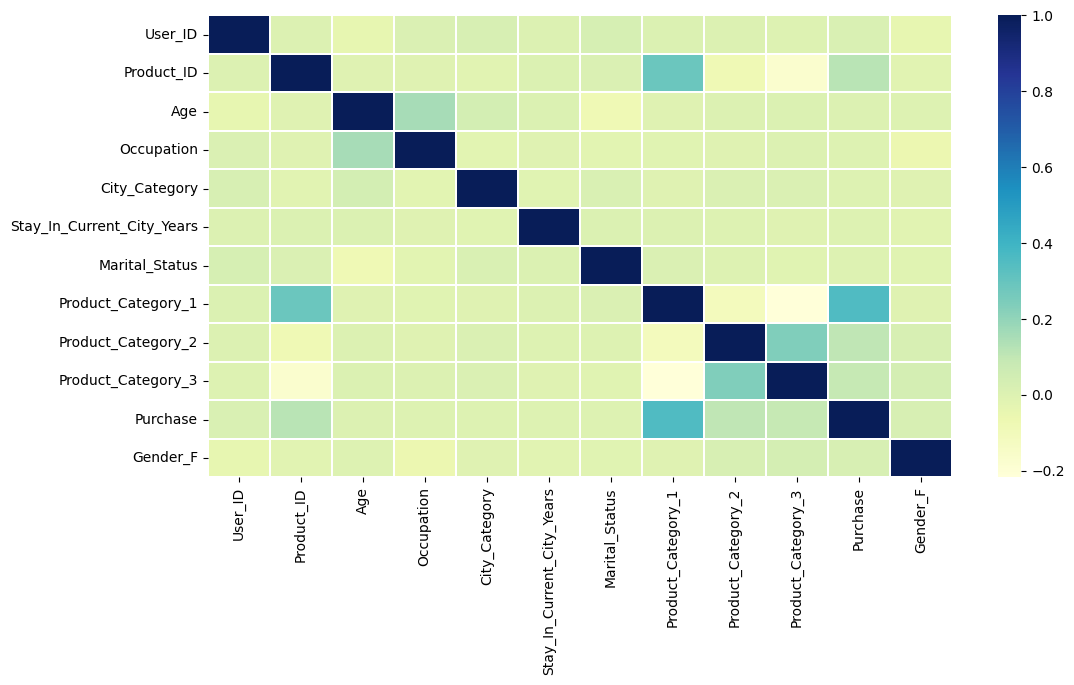

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
#train.drop(['Purchase'], axis=1, inplace=True)
corr = train.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

Hay relación entre 'Product_Category_1'. la target y 'Product_ID'. Así como con la edad y la ocupación.


#One hot encoding

In [ ]:
df = pd.get_dummies(train)
df_pred = pd.get_dummies(test)

In [ ]:
df.shape

(550068, 77)

#Variables with low variance

In [ ]:
# we eliminate variables with more than 99% equal values
for col in df.columns:
  if list(df[col].value_counts(normalize=True))[0] > 0.99:
    df = df.drop(col, axis=1)

In [ ]:
df.shape

(550068, 57)

#Split train test

In [ ]:
# The target is saved as y and the features as X
y = df['Purchase']
X = df.drop('Purchase', axis=1)

# 30% of data is saved for the test and 70% for the train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardization

In [ ]:
# variables are standardized
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# columns that are in the training dataset but are not in the prediction dataset
col_faltantes = []
for col in df.columns:
  if col not in df_pred.columns:
    col_faltantes.append(col)
col_faltantes


['Purchase']

In [ ]:
# I remove the target from the list
col_faltantes.remove('Purchase')

In [ ]:
# we add the missing columns to the prediction dataset with 0
for col in col_faltantes:
  df_pred[col] =[0]*len(df_pred)

In [ ]:
# columns that are in the prediction dataset but not in the training dataset
col_sobrantes = []
for col in df_pred.columns:
  if col not in df.columns:
    col_sobrantes.append(col)
col_sobrantes


['Product_Category_1_7',
 'Product_Category_1_9',
 'Product_Category_1_10',
 'Product_Category_1_12',
 'Product_Category_1_14',
 'Product_Category_1_17',
 'Product_Category_1_18',
 'Product_Category_2_3.0',
 'Product_Category_2_7.0',
 'Product_Category_2_10.0',
 'Product_Category_2_18.0',
 'Product_Category_3_3.0',
 'Product_Category_3_4.0',
 'Product_Category_3_6.0',
 'Product_Category_3_10.0',
 'Product_Category_3_11.0',
 'Product_Category_3_13.0',
 'Product_Category_3_18.0']

In [ ]:
# we eliminate the excess columns, since the model has not been trained with them
df_pred.drop(col_sobrantes, axis=1, inplace=True)


In [ ]:
# We verify that the datasets have the same number of variables
df_pred.shape[1] == X.shape[1]


True

In [ ]:
# we put the columns of the prediction dataset in the same order as the training one with reindex
columnas = X.columns
df_pred = df_pred.reindex(columns=columnas)


In [ ]:
# The variables of the dataset to be predicted can now be standardized according to the rule defined with the X_train with transform
df_pred = scaler.transform(df_pred)

#Modeling

In [ ]:
# models
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
# We add the models that we want to compete in a list

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ElasticNet', ElasticNet()))
models.append(('SGDRegressor', SGDRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('XGBRegressor', xgb.XGBRegressor(objective ='reg:squarederror')))

#Model competition

In [ ]:
model_comp = pd.DataFrame(columns=['Model', 'RMSE'])

for name, model in models:

    # we train the model
    model.fit(X_train, y_train)

    # we make the prediction
    y_pred = model.predict(X_test)

    # we change the negative predictions to 0
    for i, pred in enumerate(y_pred):
      if pred < 0:
        y_pred[i]=0

    # we take the RMSE measure
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    # We create a DataFrame with the current results
    new_data = pd.DataFrame([{'Model': name, 'RMSE': rmse}])

    # We concatenate the new DataFrame with model_comp
    model_comp = pd.concat([model_comp, new_data], ignore_index=True)
    print(model, rmse)

model_comp.sort_values('RMSE')

LinearRegression() 2586.790932286419
Lasso() 2586.776718041585
Ridge() 2586.7906579490946
ElasticNet() 2861.2244608057094
SGDRegressor() 2591.1932340395524
RandomForestRegressor() 2571.10253373945
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 2513.8381873844637


Model         RMSE
6           XGBRegressor  2513.838187
5  RandomForestRegressor  2571.102534
1                  Lasso  2586.776718
2                  Ridge  2586.790658
0       LinearRegression  2586.790932
4           SGDRegressor  2591.193234
3             ElasticNet  2861.224461

#Training the best model

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror')

model.fit(X_train,y_train)

X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

# cambiamos los valores negativos de predicción por 0
for i, pred in enumerate(X_test_pred):
  if pred < 0:
    X_test_pred[i]=0

# sacamos el RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, X_test_pred))
rmse


2510.540426297266

#Prediction

In [ ]:
predicciones = model.predict(df_pred)
predicciones

array([17304.707, 11853.381,  6369.238, ...,  9137.029, 17739.422,
        2668.079], dtype=float32)

In [ ]:
df_predicciones = pd.DataFrame()

In [ ]:
df_predicciones['User_ID'] = test_user_id
df_predicciones['Product_ID'] = Product_ID_pred
df_predicciones['Purchase'] = predicciones

In [ ]:
df_predicciones

User_ID Product_ID      Purchase
0       1000004  P00128942  17304.707031
1       1000009  P00113442  11853.380859
2       1000010  P00288442   6369.237793
3       1000010  P00145342   3215.150391
4       1000011  P00053842   2517.860840
...         ...        ...           ...
233594  1006036  P00118942   7602.137695
233595  1006036  P00254642   6168.866211
233596  1006036  P00031842   9137.029297
233597  1006037  P00124742  17739.421875
233598  1006039  P00316642   2668.079102

[233599 rows x 3 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

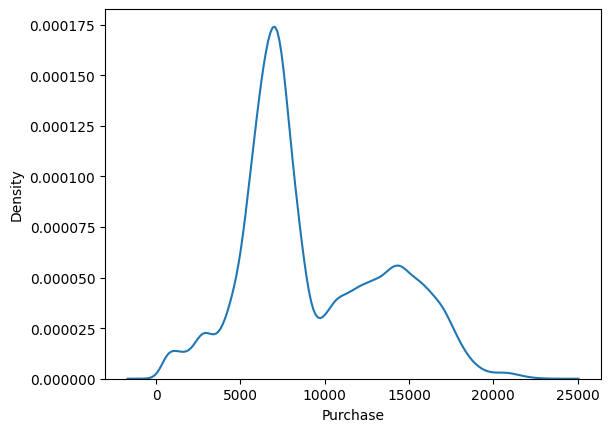

In [ ]:
sns.kdeplot(data=df_predicciones, x='Purchase')
plt.show

In [ ]:
df_predicciones.to_csv('df_predicciones.csv', index=False)

In [ ]:
! cat df_predicciones.csv

User_ID,Product_ID,Purchase
1000004,15781.11858974359,17628.156
1000009,11746.665354159932,11580.089
1000010,5731.355798821456,6490.5625
1000010,6500.105966329919,2892.5916
1000011,2585.5908289241625,2662.1787
1000013,11150.959322031747,11181.299
1000013,11557.797169811322,11437.441
1000013,10418.666429893063,10906.653
1000015,14163.189614220586,14320.222
1000022,6010.638814016175,5759.4785
1000026,14709.931849791377,12666.156
1000026,4413.130446775114,3568.8735
1000026,5905.682926829271,5324.9126
1000026,6143.3046595158285,5478.645
1000028,18153.741414141416,17815.238
1000029,14174.460674157302,14532.928
1000033,16801.768717346888,16483.396
1000033,6301.02836880672,6354.6494
1000034,7534.848404255319,7694.0264
1000035,10261.281404693986,9047.902
1000036,6330.150250417362,7016.4194
1000036,13665.648876404484,14666.832
1000042,13689.827702702703,14646.109
1000045,10203.065310826545,7175.0703
1000045,7096.390074584604,6052.219
1000045,6762.796912933309,5781.5938
1000048,16698.45589383294

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df_pred = df_predicciones.reindex(columns=["Purchase", "User_ID", "Product_ID"])
print(df_pred)

            Purchase  User_ID    Product_ID
0       17628.156250  1000004  15781.118590
1       11580.088867  1000009  11746.665354
2        6490.562500  1000010   5731.355799
3        2892.591553  1000010   6500.105966
4        2662.178711  1000011   2585.590829
...              ...      ...           ...
233594   7824.269531  1006036   8254.108026
233595   6290.660645  1006036   6550.084494
233596   9420.529297  1006036  10346.816713
233597  17548.136719  1006037  18139.306820
233598   2571.142822  1006039   2734.793765

[233599 rows x 3 columns]


In [ ]:
df_pred.to_csv('df_pred.csv', index=False)

In [ ]:
! cat df_pred.csv

Purchase,User_ID,Product_ID
17628.156,1000004,15781.11858974359
11580.089,1000009,11746.665354159932
6490.5625,1000010,5731.355798821456
2892.5916,1000010,6500.105966329919
2662.1787,1000011,2585.5908289241625
11181.299,1000013,11150.959322031747
11437.441,1000013,11557.797169811322
10906.653,1000013,10418.666429893063
14320.222,1000015,14163.189614220586
5759.4785,1000022,6010.638814016175
12666.156,1000026,14709.931849791377
3568.8735,1000026,4413.130446775114
5324.9126,1000026,5905.682926829271
5478.645,1000026,6143.3046595158285
17815.238,1000028,18153.741414141416
14532.928,1000029,14174.460674157302
16483.396,1000033,16801.768717346888
6354.6494,1000033,6301.02836880672
7694.0264,1000034,7534.848404255319
9047.902,1000035,10261.281404693986
7016.4194,1000036,6330.150250417362
14666.832,1000036,13665.648876404484
14646.109,1000042,13689.827702702703
7175.0703,1000045,10203.065310826545
6052.219,1000045,7096.390074584604
5781.5938,1000045,6762.796912933309
15735.297,1000048,16698.4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

